In [1]:
# dependencies

import missingno as msno
print("done")
import numpy as np
import pandas as pd
%matplotlib inline

print("done")

done
done


In [2]:
import re, nltk, gensim, spacy

import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

print("done")

done


In [3]:
d1 = pd.read_csv("Topic modeling comments.csv", header=None, engine='python' )


In [4]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'com', 'www'])

In [5]:
data_lemmatized = d1.iloc[:,0].tolist()

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data_lemmatized))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [6]:
from gensim.models.wrappers import LdaMallet

import pickle

model_list = pickle.load( open( "model_list_5_to_9_100_5000.p", "rb" ) )

optimal_model = model_list[2]

In [7]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary=id2word)
vis

C:\Users\huang\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\Users\huang\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: invalid value encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\Users\huang\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\Users\huang\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: invalid value encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\Users\huang\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
C:\Users\huang\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting be

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.192640 -0.219932       1        1  11.544277
7     -0.094202 -0.225960       2        1  11.511557
6     -0.026529  0.007187       3        1  11.395659
4     -0.234139  0.112876       4        1  11.382605
8      0.154159 -0.158413       5        1  11.277840
5     -0.193915  0.274517       6        1  11.201106
0      0.213903 -0.025680       7        1  10.776309
3      0.237214  0.139141       8        1  10.505107
2      0.136148  0.096263       9        1  10.405540, topic_info=     Category          Freq           Term         Total  loglift  logprob
term                                                                      
113   Default  32232.000000       vanguard  32232.000000  30.0000  30.0000
126   Default  26934.000000           call  26934.000000  29.0000  29.0000
206   Default  26559.000000         client  26559.000000  28.0000  28.0000
3     Default  23002.000000           fund  23002.000000  27.0000  27.0000
102   Default  20665.000000           send  20665.000000  26.0000  26.0000
210   Default  15086.000000         follow  15086.000000  25.0000  25.0000
108   Default  19115.000000           time  19115.000000  24.0000  24.0000
15    Default  15313.000000          model  15313.000000  23.0000  23.0000
497   Default  14412.000000           talk  14412.000000  22.0000  22.0000
464   Default  13670.000000      portfolio  13670.000000  21.0000  21.0000
26    Default  18925.000000        advisor  18925.000000  20.0000  20.0000
317   Default  12598.000000        discuss  12598.000000  19.0000  19.0000
334   Default  13051.000000          share  13051.000000  18.0000  18.0000
390   Default  12152.000000         market  12152.000000  17.0000  17.0000
216   Default  11416.000000       question  11416.000000  16.0000  16.0000
173   Default  10945.000000          speak  10945.000000  15.0000  15.0000
336   Default  10223.000000           etfs  10223.000000  14.0000  14.0000
385   Default   9525.000000         income   9525.000000  13.0000  13.0000
202   Default  12961.000000           team  12961.000000  12.0000  12.0000
421   Default  10171.000000        product  10171.000000  11.0000  11.0000
12    Default   8813.000000            etf   8813.000000  10.0000  10.0000
75    Default  12059.000000           meet  12059.000000   9.0000   9.0000
155   Default  11412.000000        meeting  11412.000000   8.0000   8.0000
183   Default   8117.000000             vg   8117.000000   7.0000   7.0000
125   Default  11371.000000       business  11371.000000   6.0000   6.0000
41    Default  13731.000000          email  13731.000000   5.0000   5.0000
479   Default   7261.000000            esg   7261.000000   4.0000   4.0000
486   Default   7307.000000  international   7307.000000   3.0000   3.0000
19    Default   7104.000000       research   7104.000000   2.0000   2.0000
63    Default   9170.000000     investment   9170.000000   1.0000   1.0000
...       ...           ...            ...           ...      ...      ...
2618   Topic9    849.682389            dan    849.682389   2.2628  -5.5295
1462   Topic9    822.234783           matt    822.234783   2.2628  -5.5624
413    Topic9    723.184730         andrew    723.184730   2.2628  -5.6907
444    Topic9    712.444362         siebel    712.444362   2.2628  -5.7057
1317   Topic9    653.969030        briefly    653.969030   2.2628  -5.7913
1487   Topic9    652.775655      flip_book    652.775655   2.2628  -5.7932
189    Topic9    936.798701           busy    940.372685   2.2590  -5.4319
822    Topic9    602.653941    circle_back    602.653941   2.2628  -5.8730
825    Topic9    591.913574             fu    591.913574   2.2628  -5.8910
1320   Topic9    539.405112          jason    539.405112   2.2628  -5.9839
5639   Topic9    514.344255       followup    514.344255   2.2628  -6.0315
102    Topic9  18485.365452           send  20665.309677   2.15

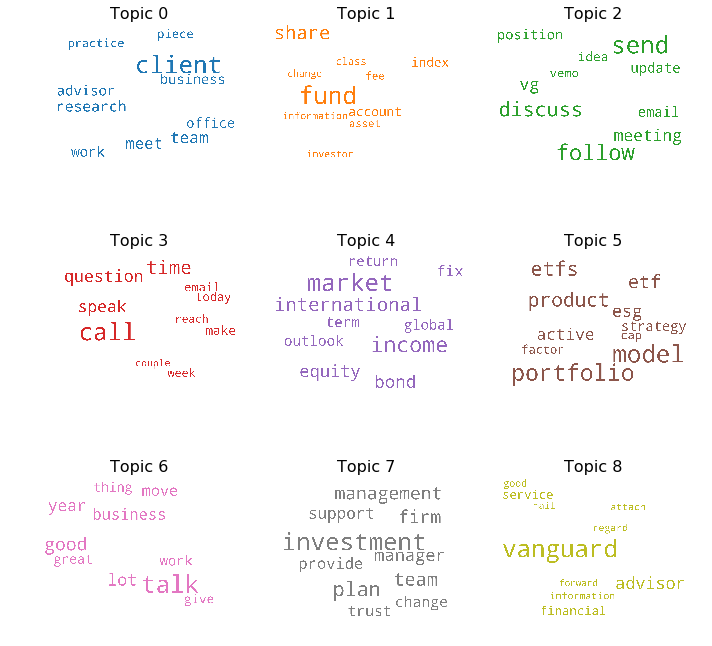

In [9]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()